In [3]:
import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools
from matplotlib.lines import Line2D
from scipy import linalg
import qinfer
import scipy

In [114]:
results_time = 'Jul_28/14_44'
results_time = 'Dec_04/15_03'

results_folder = os.path.abspath("/home/bf16951/QMD/scripts/genetic_alg_param_sweep/results/")
results_dir = os.path.join(
    results_folder, 
    results_time
)

results = pd.read_csv(
    os.path.join(results_dir, 'results.csv')
)

In [115]:
results[
    results.config_id == 1
]

,Unnamed: 0,champion_f_score,config_id,crossover_method,log_file,mutation_method,mutation_probability,num_protected_elite_models,number_generations,number_possible_models,number_sites,number_terms,resources,selection_method,starting_population_size,unchanged_elite_num_generations_cutoff,relative_resources,ResourceRequirement,true_found
1,1,0.814815,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
2,2,1.000000,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,True
5,5,0.965517,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
6,6,0.814815,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
9,9,0.950000,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False


In [116]:
configurations = pd.read_csv(os.path.join(results_dir, "configurations.csv"))

In [117]:
results.mutation_probability

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: mutation_probability, dtype: float64

In [118]:
configurations

,config_id,crossover_method,log_file,mutation_method,mutation_probability,num_protected_elite_models,number_generations,number_sites,resources,selection_method,starting_population_size,unchanged_elite_num_generations_cutoff,win_rate,mean_f_score,median_f_score,resources_reqd,cost_per_win,win_per_resource,f_value
0,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,8.0,2176.0,roulette,16.0,3.0,0.2,0.909029,0.95,0.5,10880.0,0.000092,0.000437
1,2.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,8.0,8448.0,roulette,32.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,8.0,4352.0,roulette,16.0,3.0,0.2,0.894903,0.88,1.0,21760.0,0.000046,0.000202
3,4.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,8.0,16896.0,roulette,32.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
mutation_rates = list(results.mutation_probability.unique())
elites_preserved = list(results.num_protected_elite_models.unique())
elite_generation_cutoff = list(results.unchanged_elite_num_generations_cutoff.unique())
system_sizes = list(results.number_sites.unique())

In [120]:
mutation = mutation_rates[0]
num_elites = elites_preserved[0]
num_elite_gen = elite_generation_cutoff[0]
num_sites = system_sizes[0]


conditions = (
    (results['mutation_probability'] == mutation) 
    & (results['num_protected_elite_models'] == num_elites)
    & (results['unchanged_elite_num_generations_cutoff'] == num_elite_gen)    
    & (results['number_sites'] == 8)    
 )

results_subset = results[conditions]


In [121]:
results_subset["true_found"] = results_subset["true_found"].astype(int)

this_subset_piv = pd.pivot_table(
    data = results_subset,
    values="true_found",
    columns=['number_generations'], 
    index = "starting_population_size", 
)



In [122]:

this_subset_piv.fillna("None", inplace=True)


In [123]:
this_subset_piv

number_generations,16.0,32.0
starting_population_size,,
16.0,0.2,0.2


In [124]:
results_subset[
    ["starting_population_size", "number_generations", "true_found"]
]

,starting_population_size,number_generations,true_found
0,16.0,32.0,0
1,16.0,16.0,0
2,16.0,16.0,1
3,16.0,32.0,1
4,16.0,32.0,0
5,16.0,16.0,0
6,16.0,16.0,0
7,16.0,32.0,0
8,16.0,32.0,0
9,16.0,16.0,0


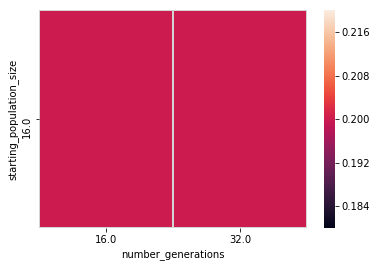

In [125]:
sns.heatmap(this_subset_piv, linewidths=.5, linecolor='lightgray')

In [126]:
results_subset[
    ["number_generations", "starting_population_size", "true_found", "number_sites", "champion_f_score"]
]

,number_generations,starting_population_size,true_found,number_sites,champion_f_score
0,32.0,16.0,0,8.0,0.888889
1,16.0,16.0,0,8.0,0.814815
2,16.0,16.0,1,8.0,1.000000
3,32.0,16.0,1,8.0,1.000000
4,32.0,16.0,0,8.0,0.857143
5,16.0,16.0,0,8.0,0.965517
6,16.0,16.0,0,8.0,0.814815
7,32.0,16.0,0,8.0,0.880000
8,32.0,16.0,0,8.0,0.848485
9,16.0,16.0,0,8.0,0.950000


In [127]:
configurations[
    ["number_sites", "number_generations", "starting_population_size", "mutation_probability", "win_rate"]
]

,number_sites,number_generations,starting_population_size,mutation_probability,win_rate
0,8.0,16.0,16.0,0.1,0.2
1,8.0,16.0,32.0,0.1,NaN
2,8.0,32.0,16.0,0.1,0.2
3,8.0,32.0,32.0,0.1,NaN


In [128]:
results

,Unnamed: 0,champion_f_score,config_id,crossover_method,log_file,mutation_method,mutation_probability,num_protected_elite_models,number_generations,number_possible_models,number_sites,number_terms,resources,selection_method,starting_population_size,unchanged_elite_num_generations_cutoff,relative_resources,ResourceRequirement,true_found
0,0,0.888889,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,268435456.0,8.0,28.0,4352.0,roulette,16.0,3.0,1.0,high,False
1,1,0.814815,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
2,2,1.000000,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,True
3,3,1.000000,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,268435456.0,8.0,28.0,4352.0,roulette,16.0,3.0,1.0,high,True
4,4,0.857143,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,268435456.0,8.0,28.0,4352.0,roulette,16.0,3.0,1.0,high,False
5,5,0.965517,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
6,6,0.814815,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False
7,7,0.880000,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,268435456.0,8.0,28.0,4352.0,roulette,16.0,3.0,1.0,high,False
8,8,0.848485,3.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,32.0,268435456.0,8.0,28.0,4352.0,roulette,16.0,3.0,1.0,high,False
9,9,0.950000,1.0,one_point,/home/bf16951/QMD/scripts/genetic_alg_param_sw...,element_wise,0.1,2.0,16.0,268435456.0,8.0,28.0,2176.0,roulette,16.0,3.0,0.5,medium-high,False


In [129]:
import scipy

In [134]:
scipy.special.comb(15, 2) * 

105.0

In [135]:
0.003773978348693227 / 0.18

0.02096654638162904